In [26]:
import numpy as np
import random
import matplotlib.pyplot as plt

## generate data

In [27]:
random.seed(42)
X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X + np.random.randn(1000, 1)
X_b = np.c_[np.ones((1000, 1)), X]
theta_initial = np.random.randn(2, 1)

## cost function ( MSE )



\begin{align*}
MSE &= \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y_i})^2
\end{align*}


In [28]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y)**2)
    return cost

## Gradient descent algorithm

A basic optimization algorithm that iteratively moves in the direction of the negative gradient of the loss function to find a minimum.

\begin{align*}
\theta_t &= \theta_{t-1} - \alpha_t g_t
\end{align*}

where:

    θ_t is the parameter vector at time step t
    g_t is the gradient of the loss function at time step t
    α_t is the learning rate at time step t


In [29]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    m = len(y)
    cost_history = np.zeros(n_iterations)

    for iteration in range(n_iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1 / m) * X.T.dot(errors)
        theta = theta - learning_rate * gradient
        cost_history[iteration] = compute_cost(X, y, theta)

    return theta, cost_history

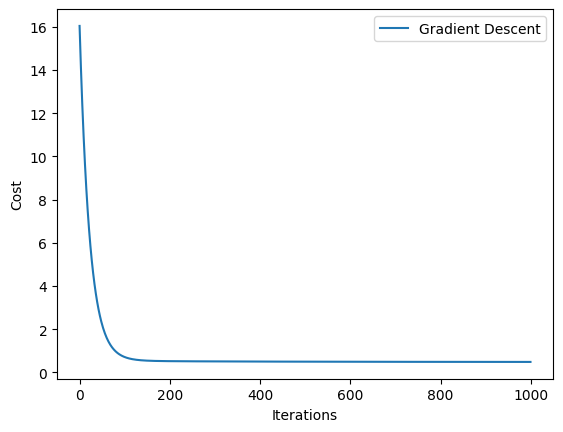

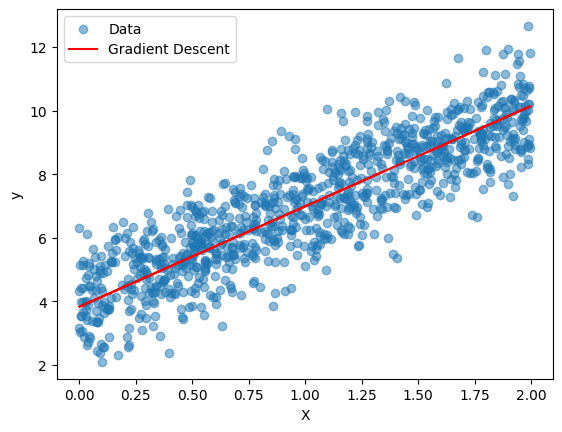

Final Cost and Parameters:
Gradient Descent - Cost: 0.4808, Parameters: [3.82766375 3.16200653]


In [30]:
theta_gd, cost_history_gd = gradient_descent(X_b, y, theta_initial, learning_rate=0.01, n_iterations=1000)
plt.plot(range(1000), cost_history_gd, label='Gradient Descent')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()
plt.scatter(X, y, alpha=0.5, label='Data')

# Gradient Descent
plt.plot(X, X_b.dot(theta_gd), label='Gradient Descent',color='red')


plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
print("Final Cost and Parameters:")
print("Gradient Descent - Cost: {:.4f}, Parameters: {}".format(cost_history_gd[-1], theta_gd.ravel()))


## Adam algorithm

The Adam algorithm is an optimization algorithm for stochastic gradient descent that combines the advantages of adaptive learning rates and momentum. It is particularly well-suited for training deep neural networks with many parameters.

\begin{align*}
v_t &= \beta_1 v_{t-1} + (1 - \beta_1) g_t \\
m_t &= \beta_2 m_{t-1} + (1 - \beta_2) g_t^2 \\
\theta_t &= \theta_{t-1} - \alpha_t \frac{m_t^{1/2}}{v_t^{1/2} + \epsilon}
\end{align*}

where:

    vt​ is the first moment estimate at time step t
    mt​ is the second moment estimate at time step t
    gt​ is the gradient of the loss function at time step t
    θt​ is the parameter vector at time step t
    αt​ is the learning rate at time step t
    β1​ and β2​ are momentum hyperparameters
    ϵ is a small constant to prevent division by zero


In [31]:
def adam_optimizer(X, y, theta, learning_rate, beta1=0.9, beta2=0.999, epsilon=1e-8, n_iterations=1000):
    m = len(y)
    cost_history = np.zeros(n_iterations)
    m_t = np.zeros_like(theta)
    v_t = np.zeros_like(theta)
    t = 0

    for iteration in range(n_iterations):
        t += 1
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1 / m) * X.T.dot(errors)

        m_t = beta1 * m_t + (1 - beta1) * gradient
        v_t = beta2 * v_t + (1 - beta2) * gradient**2

        m_t_hat = m_t / (1 - beta1**t)
        v_t_hat = v_t / (1 - beta2**t)

        theta = theta - learning_rate * m_t_hat / (np.sqrt(v_t_hat) + epsilon)
        cost_history[iteration] = compute_cost(X, y, theta)

    return theta, cost_history

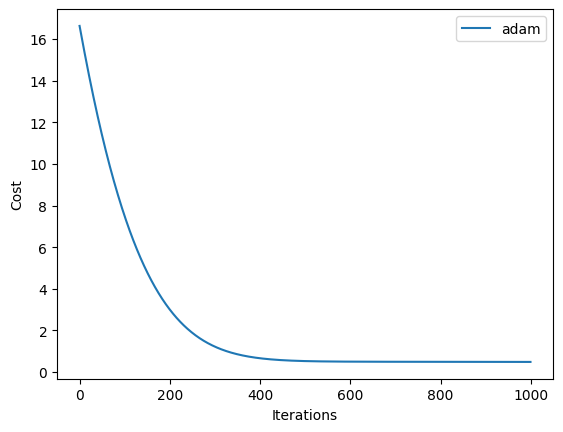

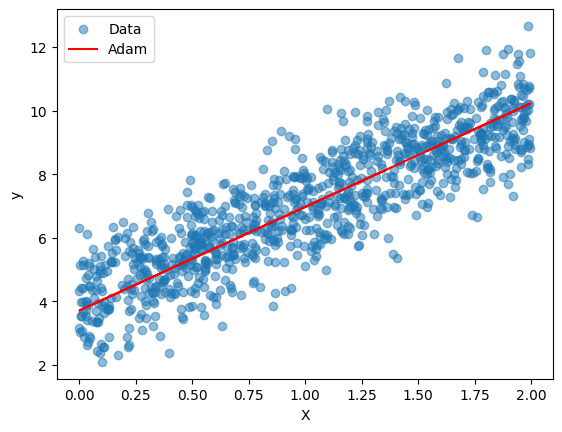

Final Cost and Parameters:
Adam - Cost: 0.4876, Parameters: [3.70790712 3.26420627]


In [32]:
theta_adam, cost_history_adam = adam_optimizer(X_b, y, theta_initial, learning_rate=0.01, n_iterations=1000)

plt.plot(range(1000), cost_history_adam, label='adam')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()
plt.scatter(X, y, alpha=0.5, label='Data')

# Gradient Descent
plt.plot(X, X_b.dot(theta_adam), label='Adam',color='red')


plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
print("Final Cost and Parameters:")
print("Adam - Cost: {:.4f}, Parameters: {}".format(cost_history_adam[-1], theta_adam.ravel()))


## Momentum_optimizer

An extension of gradient descent that incorporates momentum to accelerate convergence. It maintains a moving average of past gradients and uses this information to update the parameter vector.
\begin{align*}
v_t &= \beta_1 v_{t-1} + (1 - \beta_1) g_t \\
\theta_t &= \theta_{t-1} - \alpha_t v_t
\end{align*}

where:

    v_t is the momentum vector at time step t
    β_1 is a hyperparameter that controls the decay rate of past gradients


In [33]:
def momentum_optimizer(X, y, theta, learning_rate, momentum=0.9, n_iterations=1000):
    m = len(y)
    cost_history = np.zeros(n_iterations)
    v = np.zeros_like(theta)

    for iteration in range(n_iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1 / m) * X.T.dot(errors)

        v = momentum * v - learning_rate * gradient
        theta = theta + v

        cost_history[iteration] = compute_cost(X, y, theta)

    return theta, cost_history


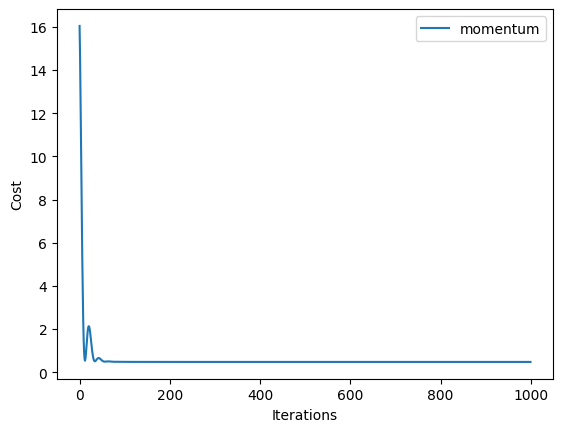

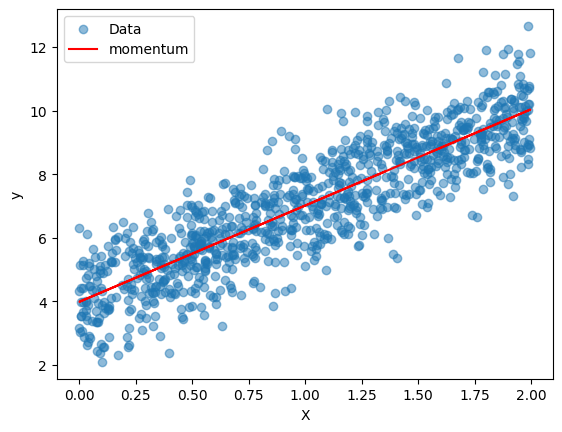

Final Cost and Parameters:
momentum - Cost: 0.4777, Parameters: [3.98319561 3.03162243]


In [34]:
theta_momentum, cost_history_momentum = momentum_optimizer(X_b, y, theta_initial, learning_rate=0.01, n_iterations=1000)
plt.plot(range(1000), cost_history_momentum, label='momentum')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()
plt.scatter(X, y, alpha=0.5, label='Data')

# Gradient Descent
plt.plot(X, X_b.dot(theta_momentum), label='momentum',color='red')


plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
print("Final Cost and Parameters:")
print("momentum - Cost: {:.4f}, Parameters: {}".format(cost_history_momentum[-1], theta_momentum.ravel()))


## RMSProp

Description: An adaptive learning rate algorithm that adjusts the learning rate for each parameter based on its historical gradients. It helps to avoid oscillations and improve convergence speed in scenarios where some parameters are updated more frequently than others.
\begin{align*}
s_t &= \beta_2 s_{t-1} + (1 - \beta_2) g_t^2 \\
g_t^{normalized} &= \frac{g_t}{\sqrt{s_t + \epsilon}} \\
\theta_t &= \theta_{t-1} - \alpha_t g_t^{normalized}
\end{align*}

In [35]:
def rmsprop_optimizer(X, y, theta, learning_rate, beta=0.9, epsilon=1e-8, n_iterations=1000):
    m = len(y)
    cost_history = np.zeros(n_iterations)
    squared_gradient = np.zeros_like(theta)

    for iteration in range(n_iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1 / m) * X.T.dot(errors)

        squared_gradient = beta * squared_gradient + (1 - beta) * gradient**2
        theta = theta - learning_rate * gradient / (np.sqrt(squared_gradient) + epsilon)

        cost_history[iteration] = compute_cost(X, y, theta)

    return theta, cost_history

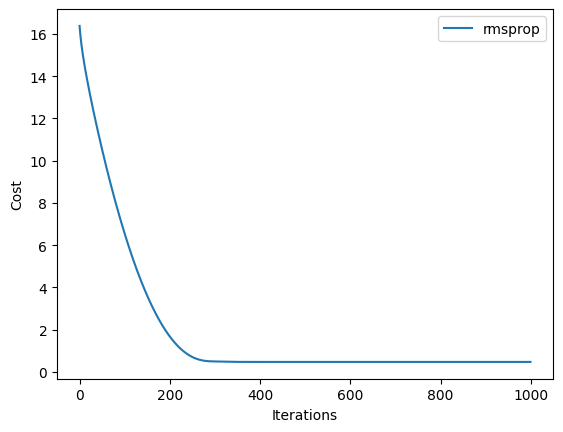

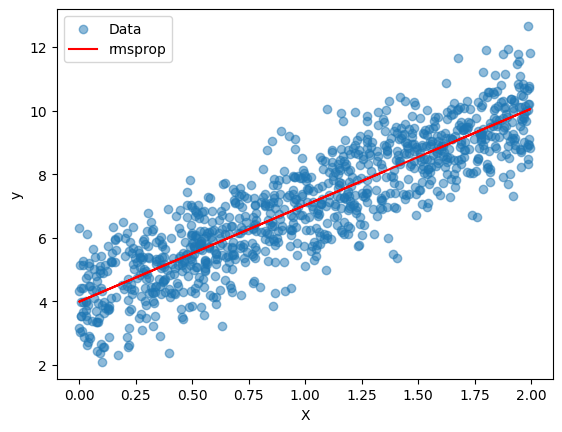

Final Cost and Parameters:
rmsprop - Cost: 0.4777, Parameters: [3.98819561 3.03662242]


In [36]:
theta_rmsprop, cost_history_rmsprop = rmsprop_optimizer(X_b, y, theta_initial, learning_rate=0.01, n_iterations=1000)
plt.plot(range(1000), cost_history_rmsprop, label='rmsprop')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()
plt.scatter(X, y, alpha=0.5, label='Data')

# Gradient Descent
plt.plot(X, X_b.dot(theta_rmsprop), label='rmsprop',color='red')


plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
print("Final Cost and Parameters:")
print("rmsprop - Cost: {:.4f}, Parameters: {}".format(cost_history_rmsprop[-1], theta_rmsprop.ravel()))


##Performance

In [37]:
# Initial parameters
theta_initial = np.random.randn(2, 1)

# Gradient Descent
theta_gd, cost_history_gd = gradient_descent(X_b, y, theta_initial, learning_rate=0.01, n_iterations=1000)

# Adam Optimization
theta_adam, cost_history_adam = adam_optimizer(X_b, y, theta_initial, learning_rate=0.01, n_iterations=1000)

# Momentum Optimization
theta_momentum, cost_history_momentum = momentum_optimizer(X_b, y, theta_initial, learning_rate=0.01, n_iterations=1000)

# RMSprop Optimization
theta_rmsprop, cost_history_rmsprop = rmsprop_optimizer(X_b, y, theta_initial, learning_rate=0.01, n_iterations=1000)

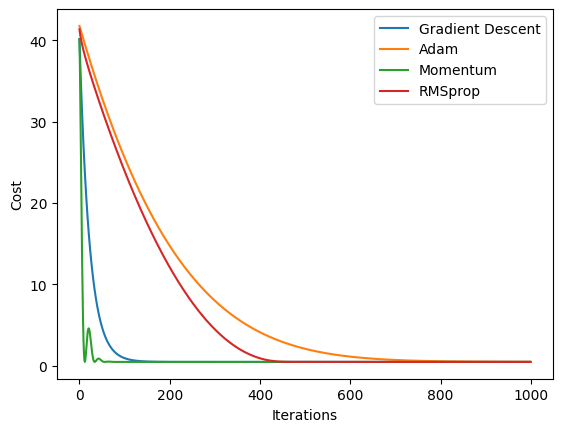

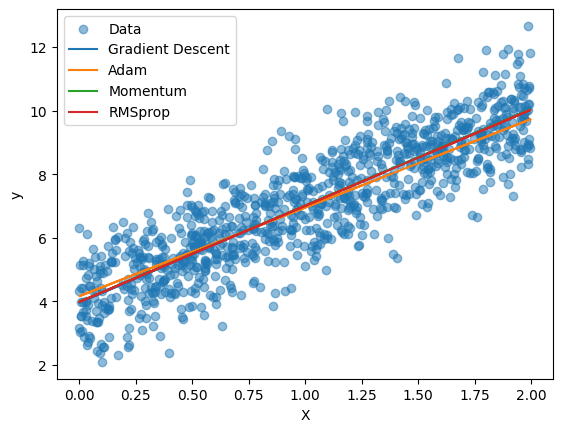

Final Cost and Parameters:
Gradient Descent - Cost: 0.4778, Parameters: [3.95445104 3.05571933]
Adam - Cost: 0.4900, Parameters: [4.16034748 2.78845018]
Momentum - Cost: 0.4777, Parameters: [3.98319562 3.03162243]
RMSprop - Cost: 0.4777, Parameters: [3.97819562 3.02662243]


In [38]:
plt.plot(range(1000), cost_history_gd, label='Gradient Descent')
plt.plot(range(1000), cost_history_adam, label='Adam')
plt.plot(range(1000), cost_history_momentum, label='Momentum')
plt.plot(range(1000), cost_history_rmsprop, label='RMSprop')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()
plt.scatter(X, y, alpha=0.5, label='Data')

# Gradient Descent
plt.plot(X, X_b.dot(theta_gd), label='Gradient Descent')

# Adam Optimization
plt.plot(X, X_b.dot(theta_adam), label='Adam')

# Momentum Optimization
plt.plot(X, X_b.dot(theta_momentum), label='Momentum')

# RMSprop Optimization
plt.plot(X, X_b.dot(theta_rmsprop), label='RMSprop')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
print("Final Cost and Parameters:")
print("Gradient Descent - Cost: {:.4f}, Parameters: {}".format(cost_history_gd[-1], theta_gd.ravel()))
print("Adam - Cost: {:.4f}, Parameters: {}".format(cost_history_adam[-1], theta_adam.ravel()))
print("Momentum - Cost: {:.4f}, Parameters: {}".format(cost_history_momentum[-1], theta_momentum.ravel()))
print("RMSprop - Cost: {:.4f}, Parameters: {}".format(cost_history_rmsprop[-1], theta_rmsprop.ravel()))

The cost history plot shows how each optimization algorithm converges over iterations.
The scatter plot with regression lines illustrates how well each algorithm fits the data.
Comparing the final cost and parameters provides insights into the performance and convergence characteristics of each algorithm.
Differences in the algorithms' behavior may be observed, demonstrating the strengths and weaknesses of each optimization technique.
The Adam optimizer is expected to adapt its learning rate dynamically, potentially converging faster than simple gradient descent.
Momentum optimization incorporates momentum to accelerate convergence, and RMSprop adjusts the learning rate based on the magnitude of recent gradients.